In [1]:
# Import all the necessary packages

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up a connection with the database

conn = psycopg2.connect(
    dbname = 'dvdrental',
    user = 'postgres',
    password = 'Kimmy027!',
    port = 5432
)

<div class="alert alert-info">

### **Analysis #2**

### How do the two stores compare in terms of Rental Count? 
- We know that people rented movies from the Sports Category the most and brought in the most sales.

**1. In pgAdmin, I set up my query so I am retrieving 4 columns that I need:**
- The category name (renamed as genre)
- The number of rentals per genre
- The total sales of each genre
- Added - The sale per rental for each genre


**2. The query consists of utilizing:**
- JOINS
- Subquery
- GROUP BY
- ORDER BY
- Aggregation Syntax
- It goes through 6 different tables in the database  

**3. Assign the query to a dataframe (cat_df)**

**4. Create a graph that shows the results of the query.**
- Use seaborn and matplotlib to create and customize the graph 

</div>

In [3]:
## Compare rental counts between two stores by monthly rental 

rent_count_df = pd.read_sql("""
        WITH T1 AS(
	        SELECT EXTRACT(year from r.rental_date) AS year,
                   EXTRACT(month from r.rental_date) AS month,
		        s.store_id AS Store_ID,
		        COUNT(*) AS Rental_Count
	        FROM rental r
	        JOIN payment p
	        ON r.rental_id = p.rental_id
	        JOIN staff st
	        ON p.staff_id = st.staff_id
	        JOIN store s
	        ON st.store_id = s.store_id
	        GROUP BY 1, 2, 3
	        ORDER BY 1)

        SELECT CONCAT('0',month,'/',year) AS Date,
	        Store_ID,
	        Rental_Count
        FROM T1;""", 
        con = conn)
        
print(rent_count_df)


      date  store_id  rental_count
0  06/2005         1          1015
1  06/2005         2          1000
2  07/2005         1          3347
3  07/2005         2          3366
4  08/2005         1          2835
5  08/2005         2          2851
6  02/2006         1            95
7  02/2006         2            87


/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


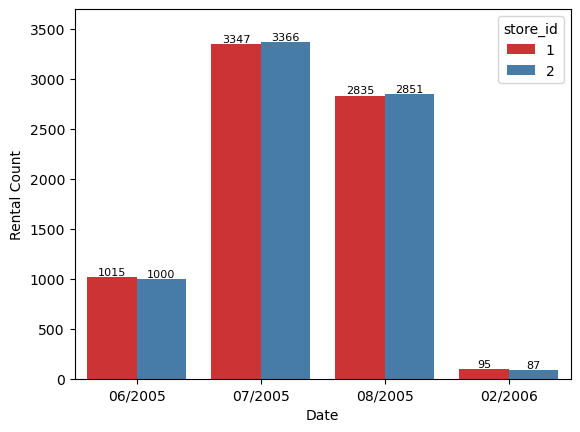

In [4]:
ax = sns.barplot(
                x = 'date',
                y = 'rental_count',
                hue = 'store_id',
                data = rent_count_df,
                palette = 'Set1'
                )
# 
ax.set(xlabel = 'Date', ylabel = 'Rental Count', ylim = (0,3700))
for container in ax.containers:
    ax.bar_label(container, size = 8)